# Numpy и матричная алгебра

In [2]:
import numpy as np

In [3]:
x = np.array( [1, 2, 3] )
y = np.array( [4, 5, 6] )

In [4]:
type(x)

numpy.ndarray

In [5]:
# дополнительные методы
x.mean()

2.0

### Поэлементные операции

In [6]:
x + y

array([5, 7, 9])

In [7]:
x * y

array([ 4, 10, 18])

In [8]:
x - y

array([-3, -3, -3])

In [9]:
x / y

array([0.25, 0.4 , 0.5 ])

In [10]:
# элементы массива x возводятся в соответствующие степени элементов массива y
x ** y

array([  1,  32, 729], dtype=int32)

In [11]:
# остаток от деления
# обратите внимание, что для удобства данного примера x и y идут в другом порядке

y % x

array([0, 1, 0], dtype=int32)

### Изменение размерности

In [12]:
x = np.arange( 0, 10 )
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# 10 - количество строк

x.shape

(10,)

In [14]:
np.array(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
).shape

(3, 2)

In [15]:
# первый аргумент - количество строк
# второй - столбцов

x.reshape( 5, 2 )

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [16]:
x.reshape( 3, 3 )

ValueError: cannot reshape array of size 10 into shape (3,3)

In [17]:
# транспонирование матриц

np.array(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
).T

array([[1, 3, 5],
       [2, 4, 6]])

In [18]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [19]:
# склеивание списков

x = np.array( [ [1, 2, 3], [4, 5, 6] ] )
x.ravel()

array([1, 2, 3, 4, 5, 6])

In [20]:
# можно и так

x.reshape( 6 )

array([1, 2, 3, 4, 5, 6])

In [ ]:
# результат разный, если добавить 1 в качестве количества строк

x.reshape( 1, 6 )

### Создание матриц

In [ ]:
# нулевой вектор заданной размерности

np.zeros(10)

In [ ]:
# аналог range

np.arange(10, 20)

In [ ]:
# единичная матрица

np.eye(5)

In [ ]:
# более общий случай диагональной матрицы

np.diag(np.arange(5), k=0)

In [ ]:
np.diag(np.arange(5), k=-2)

In [ ]:
# матрица со случайными значениями

np.random.random(10)

In [ ]:
# более универсальный вариант создания матриц

?np.linspace

In [ ]:
np.linspace(5, 25, 30)

### Более сложные распределения

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.gaussian.html

### Упражнение
Дана единичная матрица np.eye(10). Посчитайте сумму ее диагональных элементов.

# Скалярное произведение векторов

\begin{equation*}
\LARGE
\vec{a} \dot{} \vec{b} = |\vec{a}| \space |\vec{b}| \space cos(\vec{a}, \vec{b})
\end{equation*}

Пусть 
\begin{equation*}
\LARGE
\vec{a} = (a_1, a_2, a_3) \\
\LARGE
\vec{b} = (b_1, b_2, b_3)
\end{equation*}

Тогда скалярное произведение векторов равно
\begin{equation*}
\LARGE
\vec{a} \dot{} \vec{b} = a_1 b_1 + a_2 b_2 + a_3 b_3
\end{equation*}

In [27]:
a = np.array( [4, 3] )
b = np.array( [2, 1] )

In [28]:
4 * 2 + 3 * 1

11

Пример расчета скалярного произведения векторов

In [29]:
np.dot( a, b )

11

Можно посчитать и таким образом

In [30]:
# первый шаг

for pair in zip( a, b ):
    print( pair )

(4, 2)
(3, 1)


In [31]:
# второй шаг

[ pair[0] * pair[1] for pair in zip( a, b ) ]

[8, 3]

In [32]:
# итоговый результат

sum( [ pair[0] * pair[1] for pair in zip( a, b ) ] )

11

# Косинусное расстояние между векторами

\begin{equation*}
\LARGE
cos(\vec{a}, \vec{b}) = \frac{\vec{a} \dot{} \vec{b}}{|\vec{a}| \space |\vec{b}|}
\end{equation*}

In [33]:
import matplotlib.pyplot as plt

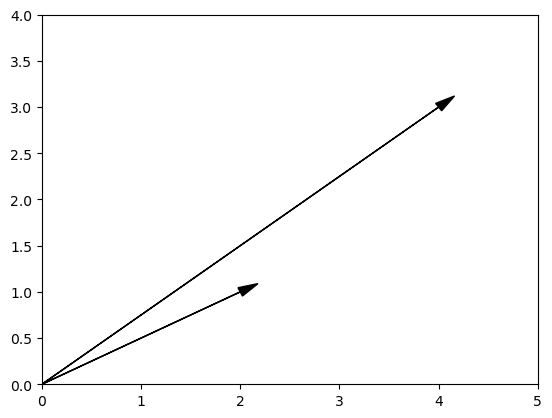

In [34]:
ax = plt.axes()

plt.xlim( [0, 5] )
plt.ylim( [0, 4] )

ax.arrow( 0, 0, a[0], a[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, b[0], b[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )

plt.show()

In [35]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [36]:
# длины векторов можно было посчитать и так

aLength = np.sqrt( (a*a).sum() )
bLength = np.sqrt( (b*b).sum() )

In [37]:
cosine( a, b )

0.9838699100999074

In [38]:
# угол между векторами в радианах

np.arccos( cosine( a, b ) )

0.17985349979247847

In [39]:
# угол между векторами в градусах

np.arccos( cosine( a, b ) ) * 360 / 2 / np.pi

10.304846468766044

## Упражнение

Имеется матрица покупок в интернет-магазине. Столбец А - ID пользователя. Остальные столбцы - количество покупок категорий товаров этим пользователем:

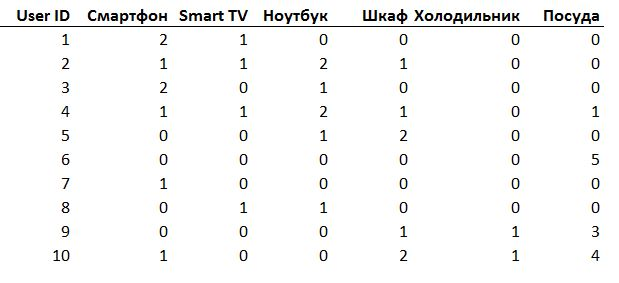

In [40]:
from IPython.display import Image
Image("user_matrix.JPG")

Матрица в виде numpy array

In [ ]:
users_stats = np.array(
    [
        [2, 1, 0, 0, 0, 0],
        [1, 1, 2, 1, 0, 0],
        [2, 0, 1, 0, 0, 0],
        [1, 1, 2, 1, 0, 1],
        [0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 5],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 3],
        [1, 0, 0, 2, 1, 4]
    ], 
    np.int32
)

На сайт заходит очередной посетитель, о покупках которого известно следующее:

In [ ]:
next_user_stats = np.array([0, 1, 2, 0, 0, 0])

Найдите самого похожего пользователя. Т. е. посчитайте косинусное расстояние между этим пользователем и всеми пользователями из массива user_stats

# Перемножение матриц

**Определение**

Пусть даны две матрицы a и b размером l x m и m x n соответственно. l - количество строк, n - количество столбцов.

\begin{equation*}
\LARGE
a = 
\begin{bmatrix}
    a_{11} & a_{12} \dots a_{1m} \\
    a_{21} & a_{22} \dots a_{2m} \\
    \vdots & \vdots \dots \vdots \\
    a_{l1} & a_{l2} \dots a_{lm}
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\LARGE
b = 
\begin{bmatrix}
    b_{11} & b_{12} \dots b_{1n} \\
    b_{21} & b_{22} \dots b_{2n} \\
    \vdots & \vdots \dots \vdots \\
    b_{m1} & b_{m2} \dots b_{mn}
\end{bmatrix}
\end{equation*}

Тогда произведением матриц a и b будет матрица c размерностью l x n:

\begin{equation*}
\LARGE
c = 
\begin{bmatrix}
    c_{11} & c_{12} \dots c_{1n} \\
    c_{21} & c_{22} \dots c_{2n} \\
    \vdots & \vdots \dots \vdots \\
    c_{l1} & c_{l2} \dots c_{ln}
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\LARGE
c_{ij} = \sum_{k=1}^m a_{ik} b_{kj}
\end{equation*}

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/1f96c71f0a99eac3ee872e7baf22e84324d7b4c9' style="width: 80%"></img>

In [41]:
a = np.array( 
    [
        [1, 2],
        [3, 4]
    ] 
)

In [42]:
b = np.array( 
    [
        [5, 6],
        [7, 8]
    ] 
)

In [43]:
c = np.dot( a, b )
c

array([[19, 22],
       [43, 50]])

В numpy есть специальный тип matrix, который отличается от ndarray

In [ ]:
aMatrix = np.matrix( [ [1, 2], [3, 4] ] )
bMatrix = np.matrix( [ [5, 6], [7, 8] ] )

In [ ]:
type(aMatrix)

In [ ]:
aMatrix * bMatrix

In [ ]:
a * b

In [ ]:
type( aMatrix ), type( a )

In [ ]:
np.mat( a ) * np.mat( b )

# Линейные уравнения

Дана система линейных уравнений

\begin{equation*}
\LARGE
x + 3*y = 9 \\
\LARGE
2*x - 4*y = 8
\end{equation*}

In [ ]:
# коэффициенты при переменных в левой части уравнения

a = np.array( [ [1, 3], [2, -4] ] )

In [ ]:
# значения в правой части уравнения

b = np.array( [9, 8] )

In [24]:
# решение

from numpy import linalg

In [ ]:
linalg.solve(a, b)

In [ ]:
# проверка верности

np.allclose( np.dot(a, linalg.solve(a, b)), b )

In [21]:
a = np.array( [ [4, 2, 1], [1, 3, 0], [0, 5, 4] ] )

In [22]:
b = np.array( [4, 12, -3] )

In [25]:
linalg.solve(a, b)

array([ 0.46666667,  3.84444444, -5.55555556])

In [26]:
np.allclose( np.dot(a, linalg.solve(a, b)), b )

True